# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [51]:
# Import the required libraries and dependencies

import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [52]:
# Load the environment variables from the .env file
#by calling the load_dotenv function

load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [53]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
BTC_coins = 1.2
ETH_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income

In [54]:
monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [55]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

BTC_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
ETH_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [56]:
# Using the Python requests library, make an API call to access the current price of BTC

BTC_response = requests.get(BTC_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(BTC_response, indent=4, sort_keys=True))

{
    "data": {
        "1": {
            "circulating_supply": 18773425,
            "id": 1,
            "last_updated": 1627844684,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 771482054462,
                    "percent_change_1h": 0.0839179175211457,
                    "percent_change_24h": -0.782945715389291,
                    "percent_change_7d": 20.0708358432634,
                    "percentage_change_1h": 0.0839179175211457,
                    "percentage_change_24h": -0.782945715389291,
                    "percentage_change_7d": 20.0708358432634,
                    "price": 41081.0,
                    "volume_24h": 26433940482
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18773425,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurre

In [57]:
# Using the Python requests library, make an API call to access the current price ETH

ETH_response = requests.get(ETH_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

print(json.dumps(ETH_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 116931160,
            "id": 1027,
            "last_updated": 1627844672,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 303533965397,
                    "percent_change_1h": 0.884876598203658,
                    "percent_change_24h": 5.54416614969067,
                    "percent_change_7d": 18.8515215387601,
                    "percentage_change_1h": 0.884876598203658,
                    "percentage_change_24h": 5.54416614969067,
                    "percentage_change_7d": 18.8515215387601,
                    "price": 2595.27,
                    "volume_24h": 23900961081
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 116931160,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [58]:
# Navigate the BTC response object to access the current price of BTC
BTC_price = BTC_response['data']['1']['quotes']['USD']['price']

# Print the current price of BTC
print(f"The current price of Bitcoin is ${BTC_price}")

The current price of Bitcoin is $41081.0


In [59]:
# Navigate the BTC response object to access the current price of ETH
ETH_price = ETH_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
print(f"The current price of Ethereum is ${ETH_price}")

The current price of Ethereum is $2595.27


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [11]:
# Compute the current value of the BTC holding 
BTC_value = BTC_price * BTC_coins

# Print current value of your holding in BTC
print(f"The current value of Bitcoin is ${BTC_value}")

The current value of Bitcoin is $49320.0


In [12]:
# Compute the current value of the ETH holding 
ETH_value = ETH_price * ETH_coins

# Print current value of your holding in ETH
print(f"The current value of Ethereum is ${ETH_value}")

The current value of Ethereum is $13763.940999999999


In [13]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
crypto_wallet_value = BTC_value + ETH_value

# Print current cryptocurrency wallet balance
print(f"The current cryptocurrency wallet balance is ${crypto_wallet_value}")

The current cryptocurrency wallet balance is $63083.941


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [60]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
SPY_shares = 110
AGG_shares = 200

#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [61]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca tradeapi.REST object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [62]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ["AGG", "SPY"]

# Set timeframe to 1D 
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
start_date = pd.Timestamp("2020-08-07")
end_date = pd.Timestamp("2020-08-07")

#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [63]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
portfolio_closing_prices = alpaca.get_barset(
    tickers,
    timeframe,
    start  = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
portfolio_closing_prices.head()

AGG                                        SPY  \
                             open     high      low   close   volume    open   
time                                                                           
2021-03-10 00:00:00-05:00  114.30  114.500  114.275  114.45  6270242  389.69   
2021-03-11 00:00:00-05:00  114.47  114.540  114.295  114.44  5740793  392.23   
2021-03-12 00:00:00-05:00  113.88  113.910  113.705  113.79  4339393  392.07   
2021-03-15 00:00:00-04:00  113.60  114.010  113.600  113.94  4210749  394.33   
2021-03-16 00:00:00-04:00  113.97  114.032  113.780  113.87  3977851  397.07   

                                                                   
                              high       low     close     volume  
time                                                               
2021-03-10 00:00:00-05:00  391.400  388.1702  389.5199  101349197  
2021-03-11 00:00:00-05:00  395.650  391.7400  393.5000   77022138  
2021-03-12 00:00:00-05:00  394.210  391.2000  394.0900   56997361  
2021-03-15 00:00:00-04:00  396.685  392.0300  396.4700   64471980  
2021-03-16 00:00:00-04:00  397.830  395.0800  395.9400   65719794

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [64]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
AGG_close_price = float(portfolio_closing_prices["AGG"]["close"][0])

# Print the AGG closing price
print(AGG_close_price)

114.45


In [65]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
SPY_close_price = float(portfolio_closing_prices["SPY"]["close"][0])

# Print the SPY closing price
print(SPY_close_price)

389.5199


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [66]:
# Calculate the current value of the bond portion of the portfolio
AGG_value = AGG_close_price * AGG_shares

# Print the current value of the bond portfolio
print(f"The current value of the bond portfolio is ${AGG_value}")

The current value of the bond portfolio is $22890.0


In [67]:
# Calculate the current value of the stock portion of the portfolio
SPY_value = SPY_close_price * SPY_shares

# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is ${SPY_value}")

The current value of the stock portfolio is $42847.189


In [68]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = SPY_value + AGG_value 

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portion is ${total_stocks_bonds}")

The current balance of the stock and bond portion is $65737.189


In [69]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency wallet to the value of the total stocks and bonds
total_portfolio = crypto_wallet_value + total_stocks_bonds

# Print current cryptocurrency wallet balance
print(f"The current cryptocurrency wallet balance is ${crypto_wallet_value}")

The current cryptocurrency wallet balance is $63083.941


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [70]:
# Consolidate financial assets data into a Python list
savings_data = crypto_wallet_value + total_stocks_bonds

# Review the Python list savings_data
savings_data

128821.13

#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [71]:
# Create a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(
    {'Amount': [crypto_wallet_value, total_stocks_bonds]},
    index=['Crypto', 'Stock/Bond']
)

# Display the savings_df DataFrame
savings_df

,Amount
Crypto,63083.941
Stock/Bond,65737.189


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':'Portfolio Composition - 2020-08-07'}, ylabel='Amount'>

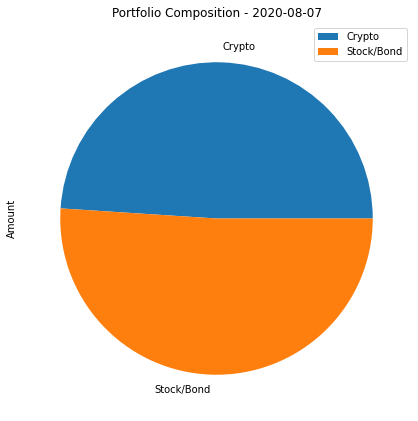

In [72]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y='Amount', title="Portfolio Composition - 2020-08-07", figsize=(7,8))

#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [73]:
# Create a variable named emergency_fund_value
emergency_fund_value = monthly_income * 3
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [74]:
amt_from_goal = savings_data - emergency_fund_value
print(amt_from_goal)

92821.13


In [75]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:

if savings_data > emergency_fund_value:
    print("Congrats! you have enough money in this fund")
elif savings_data == emergency_fund_value:
    print("Congrats! you have reached your financial goal")
else:
    print("You are $ {amt_from_goal}")

Congrats! you have enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [76]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 

start_date = pd.Timestamp("2017-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows = 1000

In [77]:
# Use the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame

three_year_pricing = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

# Display both the first and last five rows of the DataFrame

three_year_pricing.head()

AGG                                         \
                             open    high       low     close     volume   
time                                                                       
2017-08-07 00:00:00-04:00  109.69  109.72  109.6066  109.6850  1425317.0   
2017-08-08 00:00:00-04:00  109.67  109.69  109.5000  109.5810  1998999.0   
2017-08-09 00:00:00-04:00  109.87  109.87  109.6600  109.6700  2069028.0   
2017-08-10 00:00:00-04:00  109.70  109.85  109.6700  109.8053  1691677.0   
2017-08-11 00:00:00-04:00  109.75  109.94  109.6800  109.8850  1613467.0   

                              SPY                                     
                             open    high     low    close    volume  
time                                                                  
2017-08-07 00:00:00-04:00  247.49  247.87  247.37  247.850  20901988  
2017-08-08 00:00:00-04:00  247.51  248.91  246.83  247.291  44619069  
2017-08-09 00:00:00-04:00  246.47  247.31  246.06  247.230  48543032  
2017-08-10 00:00:00-04:00  246.28  246.44  243.70  243.790  87857827  
2017-08-11 00:00:00-04:00  244.02  244.80  243.75  244.110  56404847

In [78]:
three_year_pricing.tail()

AGG                                         \
                             open    high       low    close      volume   
time                                                                       
2020-08-03 00:00:00-04:00  119.37  119.40  119.1903  119.400  17837420.0   
2020-08-04 00:00:00-04:00  119.42  119.63  119.4200  119.630  21512268.0   
2020-08-05 00:00:00-04:00  119.39  119.49  119.3100  119.400  34175883.0   
2020-08-06 00:00:00-04:00  119.62  119.73  119.5300  119.580   9009216.0   
2020-08-07 00:00:00-04:00  119.66  119.73  119.3950  119.445   8830420.0   

                                SPY                                    
                               open    high     low   close    volume  
time                                                                   
2020-08-03 00:00:00-04:00  328.3200  329.62  327.73  328.76  71741125  
2020-08-04 00:00:00-04:00  327.8600  330.06  327.86  330.03  73684427  
2020-08-05 00:00:00-04:00  331.4700  332.39  331.18  332.06  72846458  
2020-08-06 00:00:00-04:00  331.4799  334.46  331.13  334.31  76900649  
2020-08-07 00:00:00-04:00  333.2800  334.88  332.30  334.55  98710236

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [88]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

MC_thirtyyear = MCSimulation(
    portfolio_data = three_year_pricing,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

# Review the simulation input data
MC_thirtyyear.portfolio_data

AGG                                          \
                             open    high       low     close      volume   
time                                                                        
2017-08-07 00:00:00-04:00  109.69  109.72  109.6066  109.6850   1425317.0   
2017-08-08 00:00:00-04:00  109.67  109.69  109.5000  109.5810   1998999.0   
2017-08-09 00:00:00-04:00  109.87  109.87  109.6600  109.6700   2069028.0   
2017-08-10 00:00:00-04:00  109.70  109.85  109.6700  109.8053   1691677.0   
2017-08-11 00:00:00-04:00  109.75  109.94  109.6800  109.8850   1613467.0   
...                           ...     ...       ...       ...         ...   
2020-08-03 00:00:00-04:00  119.37  119.40  119.1903  119.4000  17837420.0   
2020-08-04 00:00:00-04:00  119.42  119.63  119.4200  119.6300  21512268.0   
2020-08-05 00:00:00-04:00  119.39  119.49  119.3100  119.4000  34175883.0   
2020-08-06 00:00:00-04:00  119.62  119.73  119.5300  119.5800   9009216.0   
2020-08-07 00:00:00-04:00  119.66  119.73  119.3950  119.4450   8830420.0   

                                             SPY                           \
                          daily_return      open    high     low    close   
time                                                                        
2017-08-07 00:00:00-04:00          NaN  247.4900  247.87  247.37  247.850   
2017-08-08 00:00:00-04:00    -0.000948  247.5100  248.91  246.83  247.291   
2017-08-09 00:00:00-04:00     0.000812  246.4700  247.31  246.06  247.230   
2017-08-10 00:00:00-04:00     0.001234  246.2800  246.44  243.70  243.790   
2017-08-11 00:00:00-04:00     0.000726  244.0200  244.80  243.75  244.110   
...                                ...       ...     ...     ...      ...   
2020-08-03 00:00:00-04:00    -0.001338  328.3200  329.62  327.73  328.760   
2020-08-04 00:00:00-04:00     0.001926  327.8600  330.06  327.86  330.030   
2020-08-05 00:00:00-04:00    -0.001923  331.4700  332.39  331.18  332.060   
2020-08-06 00:00:00-04:00     0.001508  331.4799  334.46  331.13  334.310   
2020-08-07 00:00:00-04:00    -0.001129  333.2800  334.88  332.30  334.550   

                                                  
                             volume daily_return  
time                                              
2017-08-07 00:00:00-04:00  20901988          NaN  
2017-08-08 00:00:00-04:00  44619069    -0.002255  
2017-08-09 00:00:00-04:00  48543032    -0.000247  
2017-08-10 00:00:00-04:00  87857827    -0.013914  
2017-08-11 00:00:00-04:00  56404847     0.001313  
...                             ...          ...  
2020-08-03 00:00:00-04:00  71741125     0.006768  
2020-08-04 00:00:00-04:00  73684427     0.003863  
2020-08-05 00:00:00-04:00  72846458     0.006151  
2020-08-06 00:00:00-04:00  76900649     0.006776  
2020-08-07 00:00:00-04:00  98710236     0.000718  

[757 rows x 12 columns]

In [81]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns

MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991582,1.004736,0.988249,0.998413,1.004351,0.997314,1.001534,0.997409,0.997207,0.994152,...,1.002556,1.008663,1.014101,1.005013,0.999646,0.986986,1.004046,1.009542,1.007347,1.008702
2,1.007802,0.992098,0.991290,0.980312,1.020823,1.007091,1.002876,0.998065,0.987684,1.002769,...,1.001952,1.017575,1.003092,1.002601,0.988910,0.982180,0.999635,1.008200,1.006003,1.013082
3,1.004594,0.992127,0.985146,0.976396,1.027770,1.000167,1.006718,0.998519,0.977637,1.001287,...,1.002918,1.019720,1.012158,1.000072,0.979336,0.979214,1.005348,1.015355,0.989668,1.004279
4,1.013332,1.003694,0.983250,0.961469,1.027445,1.004668,1.008735,0.989164,0.983215,1.013197,...,0.978744,1.022089,1.007813,0.991321,0.984502,0.994305,0.985340,1.014050,1.000221,1.016438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.951252,2.153699,11.865348,3.927878,16.030463,12.846751,4.525785,13.451236,22.732465,12.431520,...,8.462914,1.805177,13.334215,4.906611,38.305360,5.400082,4.247798,23.119063,13.652886,4.237894
7557,6.045284,2.142883,11.931318,3.923557,16.127521,12.740096,4.595531,13.488303,22.384331,12.354257,...,8.395980,1.813237,13.168556,4.847633,38.968112,5.430844,4.250009,23.096843,13.840009,4.246578
7558,5.976912,2.117000,11.932215,3.925893,15.914777,12.760456,4.632569,13.499694,22.122317,12.292491,...,8.290041,1.821660,13.328094,4.802547,38.832803,5.433771,4.253766,23.223021,14.064462,4.257808
7559,6.019246,2.121034,11.754625,3.995839,16.044999,12.694065,4.610059,13.524803,22.063970,12.296361,...,8.425312,1.824359,13.497066,4.758576,39.032008,5.435463,4.212556,23.183899,14.200067,4.189503


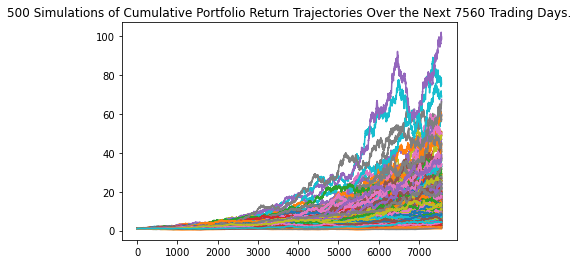

In [82]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot

MC_simulation_lineplot = MC_thirtyyear.plot_simulation()

In [36]:
MC_simulation_lineplot.get_figure().savefig("MC_thirtyyear_sim_plot.png", bbox_inches="tight")

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

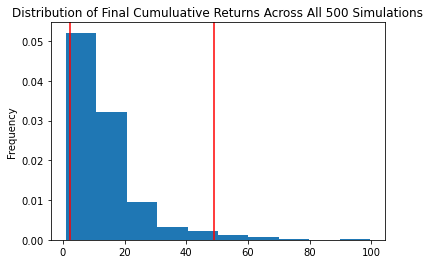

In [83]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

MC_distribution_plot = MC_thirtyyear.plot_distribution()

In [38]:
MC_distribution_plot.get_figure().savefig("MC_thirtyyear_dist_plot.png", bbox_inches="tight")

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [109]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable

MC_summary_statistics = MC_thirtyyear.summarize_cumulative_return()

# Review the 30-year Monte Carlo summary statistics
MC_summary_statistics

count           500.000000
mean             13.536843
std              11.516856
min               1.287890
25%               6.164358
50%              10.473763
75%              17.798273
max             126.148707
95% CI Lower      2.218179
95% CI Upper     42.170036
Name: 7560, dtype: float64

### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [94]:
# Print the current balance of the stock and bond portion of the members portfolio

total_stocks_bonds

65737.189

In [113]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * 65737.189
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * 65737.189

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of $67,737.189 in the portfolio"
  f" over the next 30 years will end within in the range of"
  f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")

There is a 95% chance that an initial investment of $67,737.189 in the portfolio over the next 30 years will end within in the range of $ 145816.84 and $ 2772139.62.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [96]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.

MC_tenyear = MCSimulation(
    portfolio_data = three_year_pricing,
    weights = [.20,.80],
    num_simulation = 500,
    num_trading_days = 252*10
)

# Review the simulation input data
MC_tenyear.portfolio_data

AGG                                          \
                             open    high       low     close      volume   
time                                                                        
2017-08-07 00:00:00-04:00  109.69  109.72  109.6066  109.6850   1425317.0   
2017-08-08 00:00:00-04:00  109.67  109.69  109.5000  109.5810   1998999.0   
2017-08-09 00:00:00-04:00  109.87  109.87  109.6600  109.6700   2069028.0   
2017-08-10 00:00:00-04:00  109.70  109.85  109.6700  109.8053   1691677.0   
2017-08-11 00:00:00-04:00  109.75  109.94  109.6800  109.8850   1613467.0   
...                           ...     ...       ...       ...         ...   
2020-08-03 00:00:00-04:00  119.37  119.40  119.1903  119.4000  17837420.0   
2020-08-04 00:00:00-04:00  119.42  119.63  119.4200  119.6300  21512268.0   
2020-08-05 00:00:00-04:00  119.39  119.49  119.3100  119.4000  34175883.0   
2020-08-06 00:00:00-04:00  119.62  119.73  119.5300  119.5800   9009216.0   
2020-08-07 00:00:00-04:00  119.66  119.73  119.3950  119.4450   8830420.0   

                                             SPY                           \
                          daily_return      open    high     low    close   
time                                                                        
2017-08-07 00:00:00-04:00          NaN  247.4900  247.87  247.37  247.850   
2017-08-08 00:00:00-04:00    -0.000948  247.5100  248.91  246.83  247.291   
2017-08-09 00:00:00-04:00     0.000812  246.4700  247.31  246.06  247.230   
2017-08-10 00:00:00-04:00     0.001234  246.2800  246.44  243.70  243.790   
2017-08-11 00:00:00-04:00     0.000726  244.0200  244.80  243.75  244.110   
...                                ...       ...     ...     ...      ...   
2020-08-03 00:00:00-04:00    -0.001338  328.3200  329.62  327.73  328.760   
2020-08-04 00:00:00-04:00     0.001926  327.8600  330.06  327.86  330.030   
2020-08-05 00:00:00-04:00    -0.001923  331.4700  332.39  331.18  332.060   
2020-08-06 00:00:00-04:00     0.001508  331.4799  334.46  331.13  334.310   
2020-08-07 00:00:00-04:00    -0.001129  333.2800  334.88  332.30  334.550   

                                                  
                             volume daily_return  
time                                              
2017-08-07 00:00:00-04:00  20901988          NaN  
2017-08-08 00:00:00-04:00  44619069    -0.002255  
2017-08-09 00:00:00-04:00  48543032    -0.000247  
2017-08-10 00:00:00-04:00  87857827    -0.013914  
2017-08-11 00:00:00-04:00  56404847     0.001313  
...                             ...          ...  
2020-08-03 00:00:00-04:00  71741125     0.006768  
2020-08-04 00:00:00-04:00  73684427     0.003863  
2020-08-05 00:00:00-04:00  72846458     0.006151  
2020-08-06 00:00:00-04:00  76900649     0.006776  
2020-08-07 00:00:00-04:00  98710236     0.000718  

[757 rows x 12 columns]

In [97]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008369,0.989548,1.015081,0.992709,0.997537,1.000490,1.007870,1.004694,0.995783,0.981130,...,1.003385,1.013107,0.994179,0.983075,0.995540,1.004271,1.006921,0.981295,1.013504,1.012654
2,1.015181,1.018783,1.021678,1.007174,0.987538,1.005187,0.997073,0.997836,1.009157,0.968222,...,0.999795,1.022860,0.989222,0.966695,0.992451,0.994836,1.016684,0.979754,0.993217,1.009186
3,1.015369,1.016436,1.038185,1.002538,0.990643,0.996328,0.992554,1.008438,1.036988,0.976946,...,1.019380,1.021570,0.986475,0.968133,0.993244,1.000803,1.013702,0.960176,0.983737,1.010386
4,1.005062,1.037155,1.015748,1.002016,0.993946,0.990924,1.000707,1.003633,1.024086,0.989032,...,1.034817,1.029630,0.997939,0.966515,0.959095,0.999288,0.995939,0.943605,0.999301,1.019638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,5.113433,2.224088,1.596652,1.844584,2.116394,5.239184,2.896987,3.566204,5.353051,2.585444,...,1.681882,5.169883,2.083694,2.517977,8.262089,1.710127,2.760828,5.658353,1.436874,1.666015
2517,5.144394,2.179408,1.599050,1.831936,2.108885,5.243847,2.844176,3.621593,5.382195,2.518413,...,1.682861,5.164183,2.073604,2.565640,8.262989,1.749706,2.771316,5.631338,1.438105,1.638095
2518,5.206665,2.247160,1.583257,1.842370,2.154874,5.300385,2.829682,3.598807,5.358858,2.557655,...,1.660252,5.029927,2.043323,2.573021,8.529283,1.747702,2.776968,5.575949,1.422828,1.663821
2519,5.224932,2.289952,1.592842,1.902378,2.154826,5.391567,2.843771,3.633511,5.243947,2.607166,...,1.664149,5.041213,2.038460,2.586878,8.618808,1.725794,2.762000,5.417377,1.429448,1.670553


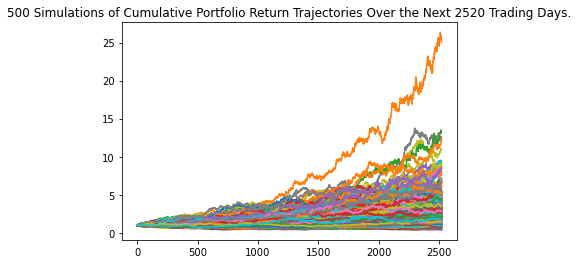

In [98]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot

MC_simulation_lineplot = MC_tenyear.plot_simulation()

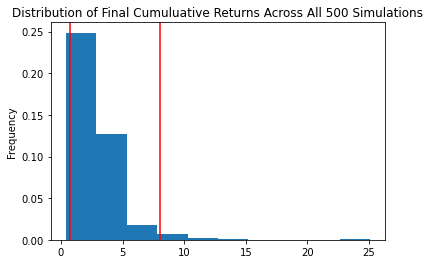

In [99]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
MC_distribution_plot = MC_tenyear.plot_distribution()

In [101]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable

MC_summary_statistics = MC_tenyear.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
MC_summary_statistics

count           500.000000
mean              2.917307
std               2.046821
min               0.394679
25%               1.679816
50%               2.455022
75%               3.625471
max              25.091114
95% CI Lower      0.769852
95% CI Upper      8.009985
Name: 2520, dtype: float64

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [89]:
# Print the current balance of the stock and bond portion of the members portfolio

total_stocks_bonds

65737.189

In [104]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = MC_summary_statistics[8] * 65737.189
ci_upper_ten_cumulative_return = MC_summary_statistics[9] * 65737.189

# Print the result of your calculations
print(f"There is a 95% chance that an initial investment of $67,737.189 in the portfolio"
  f" over the next 10 years will end within in the range of"
  f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")

There is a 95% chance that an initial investment of $67,737.189 in the portfolio over the next 10 years will end within in the range of $ 50607.88 and $ 526553.87.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?